In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [12]:
digits = datasets.load_digits()

# 选用全部数据，也就是十分类问题
X = digits.data
y = digits.target

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=666)

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\IAdmin\Software\Dev_Tools\Anaconda\envs\imooc_ai\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9408901251738526

In [16]:
y_predict = log_reg.predict(X_test)

In [19]:
from sklearn.metrics import precision_score

# 看文档加点参数就可以解决多分类问题
precision_score(y_test, y_predict, average="micro")

0.9408901251738526

In [20]:
# 混淆矩阵天生就支持多分类
from sklearn.metrics import confusion_matrix

# 可以看到十分类就是 10x10 的矩阵
confusion_matrix(y_test, y_predict)

array([[148,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0, 125,   2,   0,   0,   0,   0,   3,   2,  11],
       [  0,   1, 134,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 138,   0,   5,   0,   1,   4,   0],
       [  2,   4,   0,   0, 138,   0,   1,   3,   0,   2],
       [  1,   2,   1,   0,   0, 146,   1,   0,   0,   1],
       [  0,   2,   0,   0,   0,   1, 132,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0, 135,   0,   1],
       [  0,   8,   2,   1,   3,   3,   0,   1, 120,   2],
       [  0,   1,   0,   6,   0,   1,   0,   1,   1, 137]], dtype=int64)

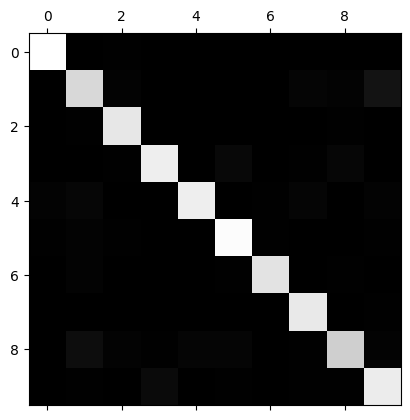

In [21]:
cfm = confusion_matrix(y_test, y_predict)
# 绘制矩阵
plt.matshow(cfm, cmap=plt.cm.gray)
plt.show()

In [23]:
# 我们不关心预测正确的数据，关心错误的部分
row_sums = np.sum(cfm, axis=1)
err_matrix = cfm / row_sums
# 将对角线（也就是预测正确）的数据清零
np.fill_diagonal(err_matrix, 0)

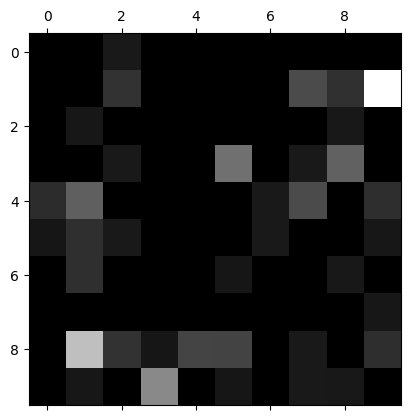

In [25]:
# 可以看到，我们现在的图变成了 越亮的地方，则是犯错越多的位置
# 则下一步就可以微调参数，使得模型整体都不会大错
# 当然很大概率也可能是这部分的样本数据质量不好，所以也要看这部分数据
plt.matshow(err_matrix, cmap=plt.cm.gray)
plt.show()